## Import Packages

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

#using retina display for Mac
#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('retina')

from matplotlib import style
style.use('ggplot')

# to suppress warningss
from warnings import filterwarnings
filterwarnings('ignore')

# # setting the plot size for graphs:
# plt.rcParams['figure.figsize'] = (12,6)

## Explore the datasets

In [2]:
ecommerce=pd.read_csv("./ecomerce_webiste_conversion.csv")

In [3]:
ecommerce.head(n=5)

Day   Reach  Impressions  Frequency  Amount Spent (USD)  Visitation  \
0  7/1/2019  139868       177275       1.27                1797        1015   
1  7/2/2019  167134       225509       1.35                2419        1545   
2  7/3/2019  156634       214946       1.37                2431        1489   
3  7/4/2019  173658       238949       1.38                2458        1541   
4  7/5/2019  128700       162153       1.26                1731        1094   

   Add_to_Cart  Conversion  
0          114          62  
1          165          91  
2          165          92  
3          165          90  
4          143          75

In [4]:
print('------------------- data shape --------------------')
print(ecommerce.shape)
print('------------------- data type & data covergage --------------------')
ecommerce.info()
print('------------------- data summarization --------------------')
ecommerce.describe()

------------------- data shape --------------------
(650, 8)
------------------- data type & data covergage --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Day                 650 non-null    object 
 1   Reach               650 non-null    int64  
 2   Impressions         650 non-null    int64  
 3   Frequency           650 non-null    float64
 4   Amount Spent (USD)  650 non-null    int64  
 5   Visitation          650 non-null    int64  
 6   Add_to_Cart         650 non-null    int64  
 7   Conversion          650 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 40.8+ KB
------------------- data summarization --------------------


Reach   Impressions   Frequency  Amount Spent (USD)  \
count  6.500000e+02  6.500000e+02  650.000000          650.000000   
mean   6.302201e+05  9.237912e+05    1.422031         4929.006154   
std    4.980962e+05  7.705934e+05    0.118024         2413.094187   
min    9.734000e+03  1.383900e+04    1.120000           -4.000000   
25%    2.171720e+05  2.907110e+05    1.340000         3291.750000   
50%    3.823595e+05  5.602995e+05    1.420000         4527.000000   
75%    1.017436e+06  1.481554e+06    1.500000         6749.250000   
max    2.027991e+06  3.430109e+06    2.360000        10177.000000   

        Visitation  Add_to_Cart  Conversion  
count   650.000000   650.000000  650.000000  
mean   3292.367692   196.838462   92.344615  
std    1461.643973    85.154261   41.293470  
min     129.000000     4.000000    1.000000  
25%    2394.750000   154.000000   73.000000  
50%    3186.500000   197.000000   95.000000  
75%    3969.750000   248.000000  119.000000  
max    7683.000000   513.000000  223.000000

## Data Visualization

In [5]:
ecommerce_ts=ecommerce.set_index('Day')

<AxesSubplot:xlabel='Day'>

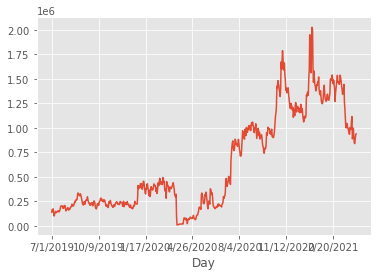

In [6]:
ecommerce_ts['Reach'].plot()

In [7]:
ecommerce_ts.columns.to_list()

['Reach',
 'Impressions',
 'Frequency',
 'Amount Spent (USD)',
 'Visitation',
 'Add_to_Cart',
 'Conversion']

In [8]:
def visualize_ts(lst):
    for l in lst:
        ecommerce_ts[l].plot()
        plt.title('TS chart for {}'.format(l))
        plt.show()

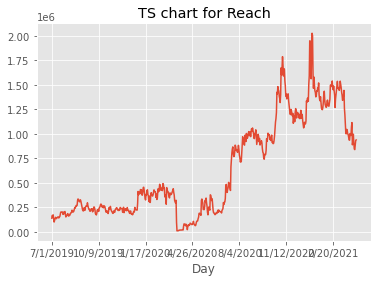

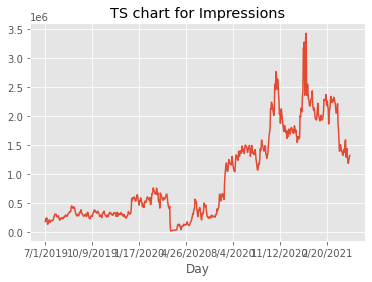

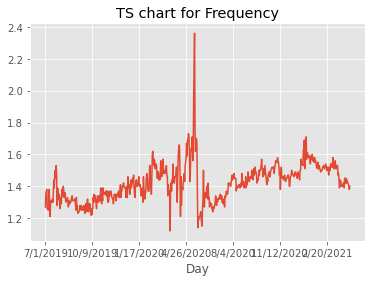

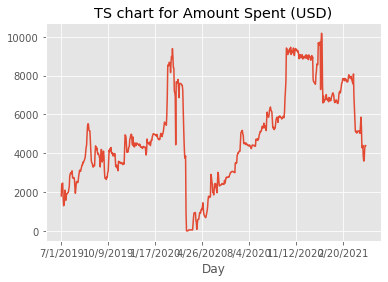

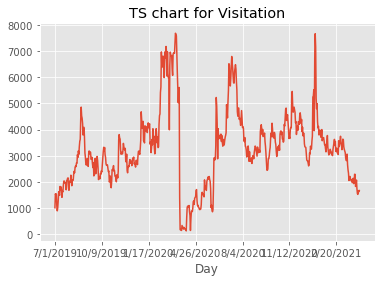

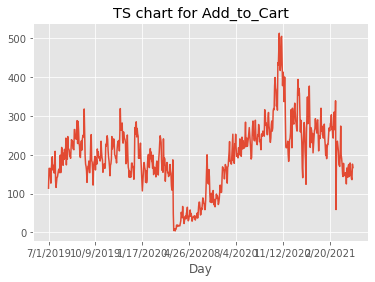

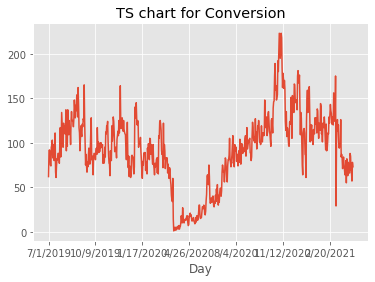

In [9]:
visualize_ts(ecommerce_ts.columns.to_list())

In [10]:
import plotly.express as px

In [11]:
def visualize_ts2(lst):
    for l in lst:
        fig = px.line(ecommerce, x="Day", y=l)
        fig.show()

In [12]:
visualize_ts2(ecommerce_ts.columns.to_list())

## Time-series correlation

### Metric

1. NBR - Net Book Rate: Conversion/Reach

In [13]:
ecommerce[ecommerce_ts.columns.to_list()].corr()

Reach  Impressions  Frequency  Amount Spent (USD)  \
Reach               1.000000     0.997637   0.471139            0.808520   
Impressions         0.997637     1.000000   0.506827            0.805904   
Frequency           0.471139     0.506827   1.000000            0.375064   
Amount Spent (USD)  0.808520     0.805904   0.375064            1.000000   
Visitation          0.335709     0.333831   0.128731            0.646606   
Add_to_Cart         0.670492     0.663513   0.136811            0.743452   
Conversion          0.594425     0.588523   0.080214            0.715162   

                    Visitation  Add_to_Cart  Conversion  
Reach                 0.335709     0.670492    0.594425  
Impressions           0.333831     0.663513    0.588523  
Frequency             0.128731     0.136811    0.080214  
Amount Spent (USD)    0.646606     0.743452    0.715162  
Visitation            1.000000     0.398537    0.373175  
Add_to_Cart           0.398537     1.000000    0.968292  
Conversion            0.373175     0.968292    1.000000

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7)})

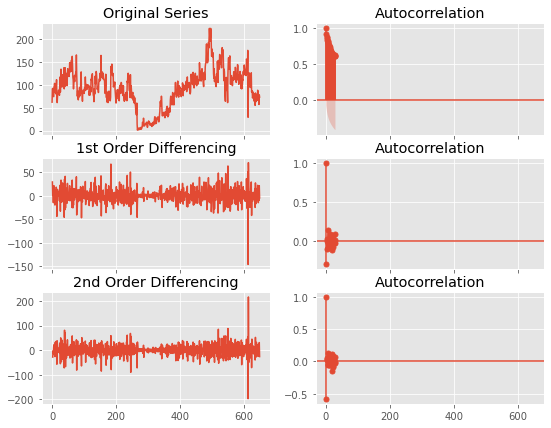

In [15]:
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(ecommerce.Conversion); axes[0, 0].set_title('Original Series')
plot_acf(ecommerce.Conversion, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ecommerce.Conversion.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ecommerce.Conversion.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ecommerce.Conversion.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ecommerce.Conversion.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [16]:
for n,i in enumerate(ecommerce_ts.columns.to_list()):
    print(n+1,"-",i)

1 - Reach
2 - Impressions
3 - Frequency
4 - Amount Spent (USD)
5 - Visitation
6 - Add_to_Cart
7 - Conversion


In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

def acf_calc(lst):
    item = lst.columns.to_list()
    for n,i in enumerate(item):
        print("-----------------------------", n+1,". ACF for", i, "-----------------------------")
        fig = plt.figure(figsize=(12,8))
        ax1 = fig.add_subplot(211)
        fig = sm.graphics.tsa.plot_acf(ecommerce[i].dropna(),lags=40,ax=ax1)
        ax2 = fig.add_subplot(212)
        fig = sm.graphics.tsa.plot_pacf(ecommerce[i].dropna(),lags=40,ax=ax2)
        
        plt.show()

----------------------------- 1 . ACF for Reach -----------------------------


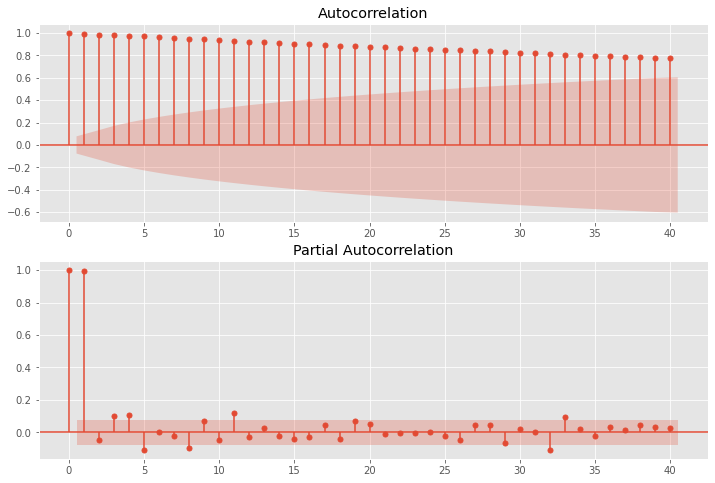

----------------------------- 2 . ACF for Impressions -----------------------------


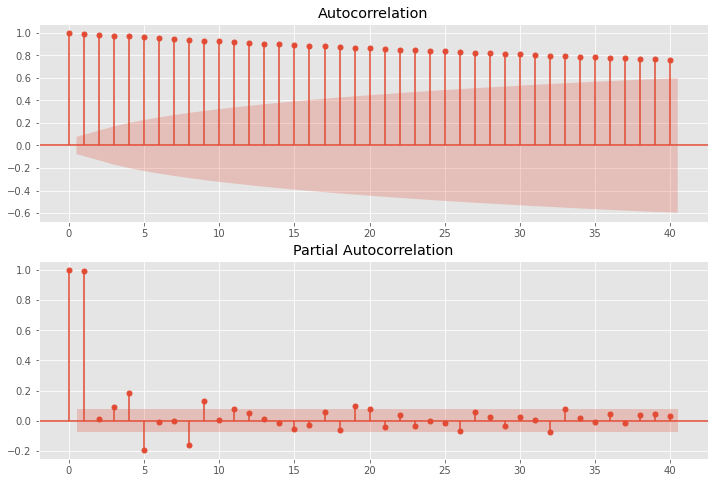

----------------------------- 3 . ACF for Frequency -----------------------------


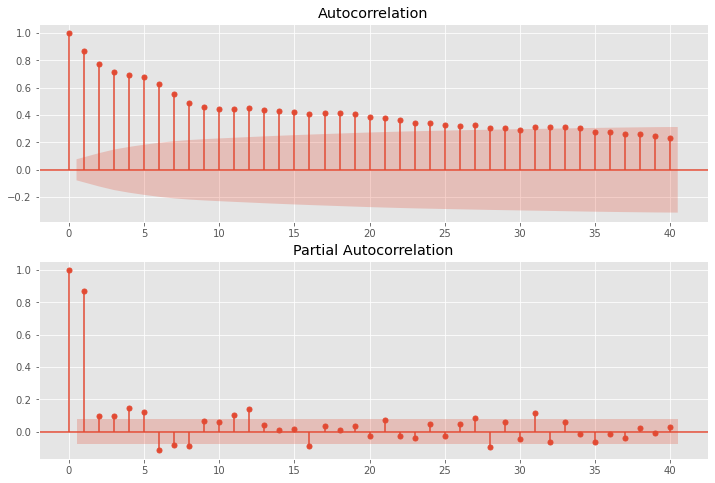

----------------------------- 4 . ACF for Amount Spent (USD) -----------------------------


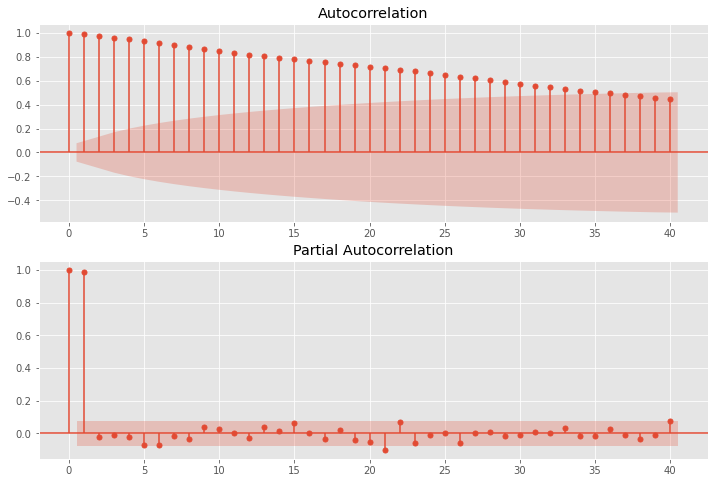

----------------------------- 5 . ACF for Visitation -----------------------------


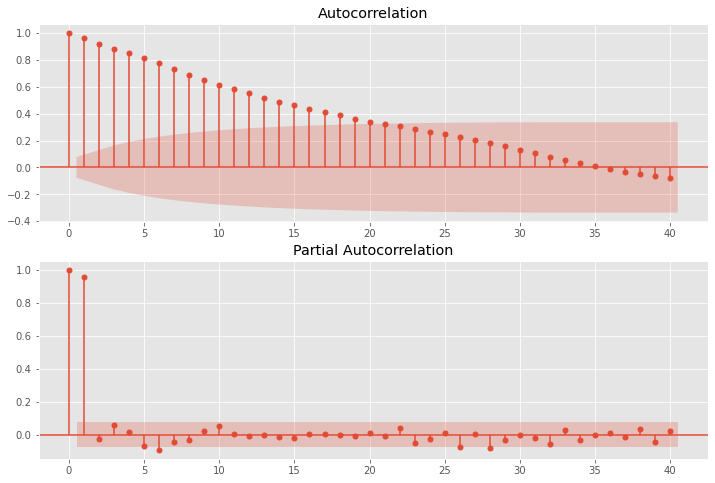

----------------------------- 6 . ACF for Add_to_Cart -----------------------------


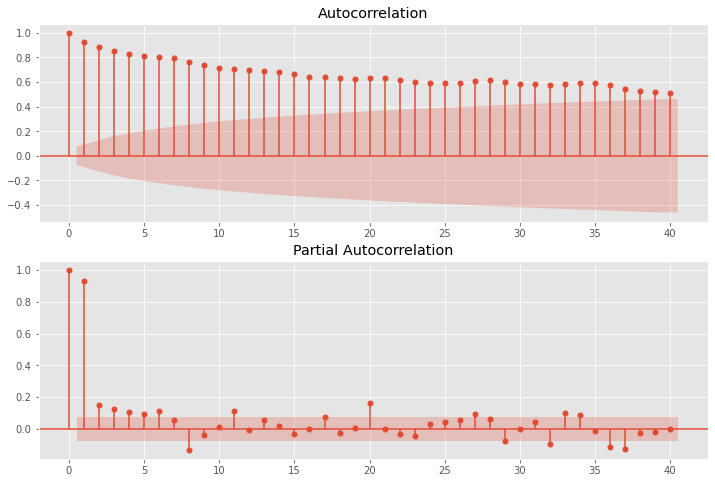

----------------------------- 7 . ACF for Conversion -----------------------------


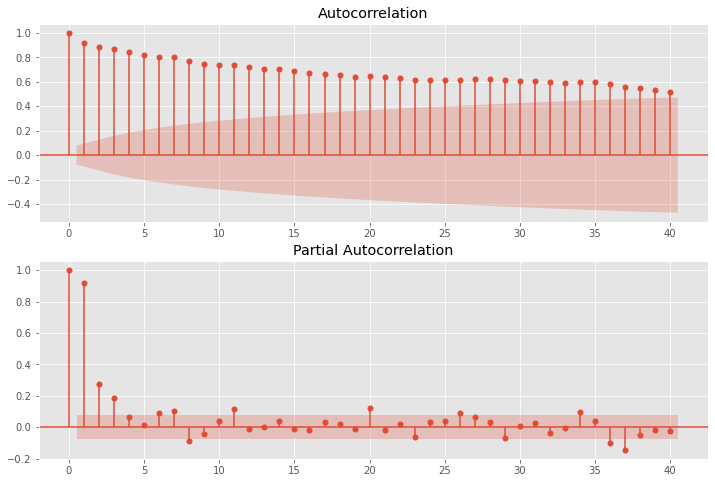

In [18]:
acf_calc(ecommerce_ts)

## Time-series decomposition

In [19]:
ecommerce_ts=pd.read_csv("./ecomerce_webiste_conversion.csv",index_col=[0],parse_dates = True)

In [20]:
ecommerce_ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 650 entries, 2019-07-01 to 2021-04-10
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Reach               650 non-null    int64  
 1   Impressions         650 non-null    int64  
 2   Frequency           650 non-null    float64
 3   Amount Spent (USD)  650 non-null    int64  
 4   Visitation          650 non-null    int64  
 5   Add_to_Cart         650 non-null    int64  
 6   Conversion          650 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.6 KB


<Figure size 864x576 with 0 Axes>

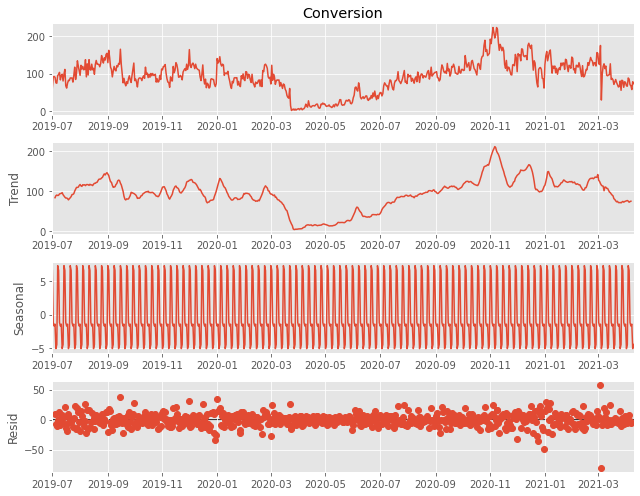

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
fig = plt.figure(figsize=(12,8))
seasonal_decompose(ecommerce_ts['Conversion']).plot()
plt.show()

## Build an ARIMA model

In [22]:
# Import the library
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(ecommerce_ts['Conversion'], start_p = 1, start_q = 1,
                        max_p = 3, max_q = 3, m = 12,
                        start_P = 0, seasonal = True,
                        d = None, D = 1, trace = True,
                        error_action ='ignore', # we don't want to know if an order does not work
                        suppress_warnings = True, # we don't want convergence warnings
                        stepwise = True) # set to stepwise

# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.01 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=6201.682, Time=0.04 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=5613.085, Time=1.15 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=5797.847, Time=1.15 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=6199.739, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=5781.316, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=5543.404, Time=2.70 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=5.28 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=2.26 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=6103.150, Time=1.07 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=5514.619, Time=3.12 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=5597.200, Time=1.69 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=7.21 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.70 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : AIC=5

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  650
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2741.082
Date:                            Mon, 16 Aug 2021   AIC                           5494.163
Time:                                    22:09:10   BIC                           5520.914
Sample:                                         0   HQIC                          5504.548
                                            - 650                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5686      0.033     17.252      0.000       0.504       0.633
ar.L2          0.1151      0.040      2.873      0.004       0.037       0.194
ar.L3          0.1805      0.036      5.022      0.000       0.110       0.251
ar.S.L12      -0.6657      0.031    -21.516      0.000      -0.726      -0.605
ar.S.L24      -0.3882      0.032    -12.224      0.000      -0.450      -0.326
sigma2       311.9240     11.129     28.029      0.000     290.112     333.736
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               609.42
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.55   Skew:                            -0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
len(ecommerce_ts['Conversion'])

650

In [24]:
# Split data into train / test sets
train = ecommerce_ts.iloc[:len(ecommerce_ts)-120]
test = ecommerce_ts.iloc[len(ecommerce_ts)-120:] # set one year(12 months) for testing

# Fit a SARIMAX(3, 0, 0)x(2, 1, 0, 12) on the training set
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['Conversion'],
                order = (3, 0, 0),
                seasonal_order =(2, 1, 0, 12))

result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Conversion   No. Observations:                  530
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood               -2171.718
Date:                            Mon, 16 Aug 2021   AIC                           4355.436
Time:                                    22:09:11   BIC                           4380.935
Sample:                                07-01-2019   HQIC                          4365.427
                                     - 12-11-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6404      0.040     15.830      0.000       0.561       0.720
ar.L2          0.0943      0.046      2.067      0.039       0.005       0.184
ar.L3          0.1508      0.037      4.047      0.000       0.078       0.224
ar.S.L12      -0.6572      0.037    -17.944      0.000      -0.729      -0.585
ar.S.L24      -0.3758      0.042     -9.012      0.000      -0.458      -0.294
sigma2       252.7941     12.844     19.682      0.000     227.621     277.968
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                41.79
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                             0.45
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Day'>

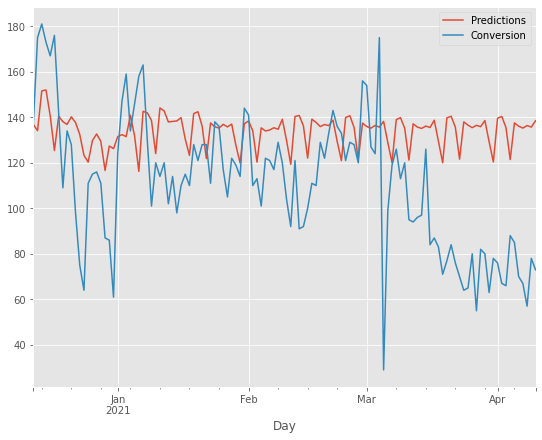

In [25]:
start = len(train)
end = len(train) + len(test) - 1

# Predictions for one-year against the test set
predictions = result.predict(start, end,
             typ = 'levels').rename("Predictions")

# plot predictions and actual values
predictions.plot(legend = True)
test['Conversion'].plot(legend = True)

In [26]:
# Load specific evaluation tools
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

# Calculate root mean squared error
rmse(test['Conversion'], predictions)

37.54992785662424

In [27]:
# Calculate mean squared error
mean_squared_error(test['Conversion'], predictions)

1409.9970820376848

<AxesSubplot:xlabel='Day'>

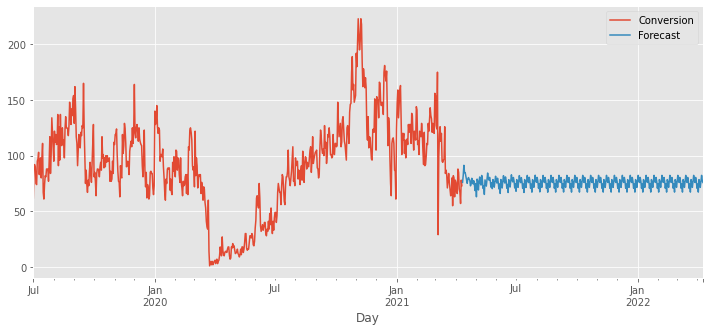

In [28]:
# Train the model on the full dataset
model = model = SARIMAX(ecommerce_ts['Conversion'],
                        order = (3, 0, 0),
                        seasonal_order =(2, 1, 0, 12))
result = model.fit()

# Forecast for the next 3 years
forecast = result.predict(start = len(ecommerce_ts),
                            end = (len(ecommerce_ts)-1) + 365,
                            typ = 'levels').rename('Forecast')

# Plot the forecast values
ecommerce_ts['Conversion'].plot(figsize = (12, 5), legend = True)
forecast.plot(legend = True)

## Using Facebook prophet

In [29]:
from prophet import Prophet

ecomm_fb = ecommerce[['Day','Conversion']]
ecomm_fb.columns =['ds','y']

ModuleNotFoundError: No module named 'prophet'

In [ ]:
ecomm_fb.head(n=5)

In [ ]:
# Python
m = Prophet(yearly_seasonality=True)
m.fit(ecomm_fb)

In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
# Python
fig1 = m.plot(forecast)

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
# Python
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
# Python
m = Prophet(changepoint_prior_scale=0.5)
forecast = m.fit(ecomm_fb).predict(future)
fig = m.plot(forecast)

In [ ]:
# Python
m = Prophet(changepoint_prior_scale=0.005)
forecast = m.fit(ecomm_fb).predict(future)
fig = m.plot(forecast)

In [ ]:
# Python
m = Prophet(changepoints=['2020-03-24'],changepoint_prior_scale=0.5)
forecast = m.fit(ecomm_fb).predict(future)
fig = m.plot(forecast)

### US Holidays

In [ ]:
# Python
m = Prophet()
m.add_country_holidays(country_name='US')
m.fit(ecomm_fb)

In [ ]:
m.train_holiday_names


In [ ]:
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
forecast[(forecast['holidays']).abs() > 0]

In [ ]:
# Python
from prophet.plot import plot_yearly
m = Prophet(yearly_seasonality=True).fit(ecomm_fb)
a = plot_yearly(m)

### Multiplacative Seasonality

In [ ]:
# Python
m = Prophet(seasonality_mode='multiplicative')
m.fit(ecomm_fb)
forecast = m.predict(future)
fig = m.plot(forecast)

In [ ]:
fig = m.plot_components(forecast)

In [ ]:
# Python
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')

### Cross Validation

In [ ]:
# Python
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='550 days', period='30 days', horizon = '90 days')

In [ ]:
df_cv.head()

In [ ]:
# Python
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

In [ ]:
# Python
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')


In [ ]:
# Python
import itertools
import numpy as np
import pandas as pd

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(ecomm_fb)  # Fit model with given params
    df_cv = cross_validation(m, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)